In [51]:
# 換股時間
import pandas as pd
location = "../0056成份股季調整生效日期.xlsx"
time_df = pd.read_excel(location)

time_start_end = time_df.iloc[:, :2]
time_start_end

,生效日期,結束日
0,2017-09-27,2017-12-15
1,2017-12-18,2018-06-15
2,2018-06-18,2018-12-21
3,2018-12-22,2019-06-21
4,2019-06-24,2019-12-20
5,2019-12-23,2020-06-19
6,2020-06-22,2020-12-18
7,2020-12-21,2021-03-19
8,2021-03-22,2021-06-18
9,2021-06-21,2021-09-17


In [68]:
import json
from datetime import datetime
import numpy as np
def getVarRank(codename_list, start_time, end_time):
    var_dict = {}
    var_sum = 0.0
    for codename in codename_list:
        try:
            symbol = tw_stock_symbol_code[codename]
        except:
            symbol = tw_stock_symbol_code[check[codename]]
        data = pd.read_csv(f"../DB/TW/{symbol}.csv", index_col="Date")
        data_adj = data.loc[(data.index >= start_time) & (data.index <= end_time)]["Adj Close"]
        variance = np.var(data_adj)
        var_dict[symbol] = variance
        var_sum += variance
    
    return var_dict, var_sum

def getSumOfDictValues(dict):
    var_sum = 0.0
    for _, value in dict.items():
        var_sum += value
    return value

def rankDictByValues(my_dict):
    sorted_dict = dict(sorted(my_dict.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict

def getDF(codename_list, start_time, end_time):
    df = pd.DataFrame()
    for codename in codename_list:
            try:
                symbol = tw_stock_symbol_code[codename]
            except:
                symbol = tw_stock_symbol_code[check[codename]]
            data = pd.read_csv(f"../DB/TW/{symbol}.csv", index_col="Date")
            data_adj = data.loc[(data.index >= start_time) & (data.index <= end_time)]["Adj Close"]
            data_adj.name = symbol
            df = pd.concat([df, data_adj], axis=1)

    df.dropna(inplace=True)
    return df

def getWeightsOfDictValue(maxWeight=0.1, var_dict):
    pass
# 有對照錯誤的股票中文名稱
check = {'聚陽實業':'聚陽',
         "矽品": "矽品精密",
         "仁寶電腦":"仁寶",
         "群創光電":"群創",
         "微星科技":"微星",
         "智邦科技":"智邦",
         "群光電子":"群光",
         "聯強國際":"聯強",
         "創見資訊":"創見"
}


with open("../DB/0056_Ingred.json", "r", encoding="UTF-8") as f:
    data = json.load(f)

with open("../DB/tw_stock_symbol_code.json", "r") as f:
    tw_stock_symbol_code = json.load(f)

# precalculation for weighting system for the first quarter starting from 2017-09-27
start_time_pre = "2017-06-26"
end_time_pre = "2017-09-26"
var_dict, var_sum = getVarRank(data["17Q4"], start_time_pre, end_time_pre)


for i, season in enumerate(['17Q4']):
    start_time = datetime.strftime(time_start_end.iloc[i, 0], "%Y-%m-%d")
    end_time = datetime.strftime(time_start_end.iloc[i, 1], "%Y-%m-%d")
    df = getDF(data[season], start_time, end_time)



var_sum = getSumOfDictValues(var_dict)
ranked_dict = rankDictByValues(var_dict)
weight_total = 1
weight_dict = {}
for key, value in ranked_dict.items():
    if value/var_sum > 0.1:
        weighting = 0.1
    else:
        weighting = value/var_sum
    weight_total -= weighting
    weight_dict[key] = weighting

{'2357': 44.73702448554406,
 '2345': 30.056261287805505,
 '6176': 12.218505021002237,
 '2377': 7.718550949497427,
 '4938': 6.76876019762069,
 '1477': 5.724187732799158,
 '6239': 5.44111758878951,
 '3034': 4.803460816443336,
 '2382': 2.77681532509192,
 '1326': 1.9601182918019486,
 '2301': 1.6598509558131331,
 '3231': 0.8396881495621367,
 '2347': 0.7227633969766067,
 '2385': 0.6624699704447247,
 '2352': 0.6076529943323229,
 '1704': 0.5268135781244433,
 '2542': 0.48578868952508153,
 '2324': 0.4372320625786803,
 '3702': 0.3999539103115932,
 '3481': 0.26565975733963865,
 '2376': 0.2267664171696835,
 '2449': 0.21836034017648812,
 '2356': 0.15673171587605908,
 '2325': 0.1547478391158124,
 '2409': 0.1217512190630831,
 '2883': 0.1049441976117881,
 '1101': 0.06697070085583745,
 '3706': 0.04778889840209683,
 '2891': 0.026798486562765098,
 '2886': 0.024440310007348233}

In [34]:
import pandas as pd
import yfinance as yf

# Assuming you have already fetched the stock price data using yfinance
# Replace 'AAPL' with the ticker symbol of the stock you're interested in
stock_data = yf.download('AAPL', start='2016-12-31', end='2018-01-01')

# Convert the index to datetime if it's not already in datetime format
stock_data.index = pd.to_datetime(stock_data.index)

# Filter the DataFrame to include only the specified time interval
start_date = '2017-01-01'
end_date = '2018-01-01'
filtered_data = stock_data.loc[(stock_data.index >= start_date) & (stock_data.index <= end_date)]

print(filtered_data)


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-01-03  28.950001  29.082500  28.690001  29.037500  26.989269  115127600
2017-01-04  28.962500  29.127501  28.937500  29.004999  26.959055   84472400
2017-01-05  28.980000  29.215000  28.952499  29.152500  27.096157   88774400
2017-01-06  29.195000  29.540001  29.117500  29.477501  27.398232  127007600
2017-01-09  29.487499  29.857500  29.485001  29.747499  27.649191  134247600
...               ...        ...        ...        ...        ...        ...
2017-12-22  43.669998  43.855000  43.625000  43.752499  41.320251   65397600
2017-12-26  42.700001  42.867500  42.419998  42.642502  40.271976  132742000
2017-12-27  42.525002  42.695000  42.427502  42.650002  40.279045   85992800
2017-12-28  42.750000  42.962502  42.619999  42.770000  40.392372   65920800
2017-12-29  42.630001  42.647499  42.305000  42.307499  39.955585  103999600

Text(0.5, 1.0, '0056 return')

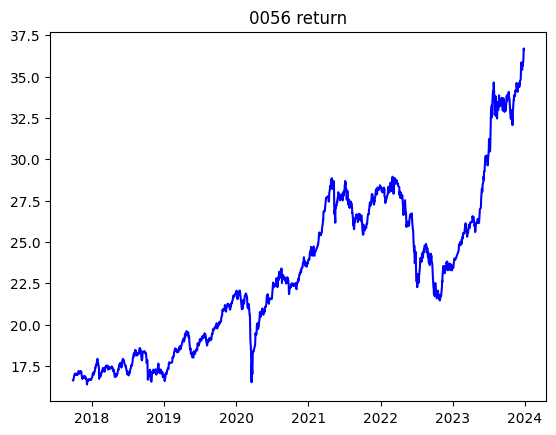

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
origin_ = yf.download("0056.TW", start="2017-09-27", end="2023-12-29", progress=False)

origin = origin_['Adj Close']
plt.plot(origin, color='blue')
plt.title("0056 return")